** This notebook assumes ... **

1) Basic familiarity with gwsurrogate as covered in basics.ipynb 

2)  Basic familiarity with multi-modal and fast-spline (linear) surrogates as covered in numerical_relativity.ipynb

In [1]:
### setup paths used throughout this notebook ###
import sys
path_to_gws = '/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/'
sys.path.append(path_to_gws)

##%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
import gwsurrogate as gws
import gwsurrogate.gwtools as gwtools

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/gwtools/gwtools.py:54: UserWarning: using non-LAL constants
  _warnings.warn("using non-LAL constants")
/home/balzani57/pool/anaconda3/envs/Python27/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Setup

First we need to download the time-domain 4d2s precessing model. Its about 9GB, so start the download and go grab a coffee. 

In [5]:
gws.surrogate_repo.get("NRSur4d2s_TDROM_grid12")

'/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/../surrogate_downloads/SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5'

In [8]:
# create a surrogate from the newly downloaded h5 file
path_to_surrogate = path_to_gws+'surrogate_downloads/NRSur4d2s_TDROM_grid12.h5'
sur_grid12 = gws.EvaluateSurrogate(path_to_surrogate,use_orbital_plane_symmetry=False)

loading surrogate mode... l2_m-1

>>> Warning: Guessing quadrature weights to be identical with 3.958740
Cannot load greedy points...OK
Cannot load eim points...OK
Special case: using fast tensor spline for real and imaginary parts instead of amp/phase
Loading fast tensor spline breakpoints
loading surrogate mode... l2_m-2

>>> Warning: Guessing quadrature weights to be identical with 3.958740
Cannot load greedy points...OK
Cannot load eim points...OK
Special case: using fast tensor spline for real and imaginary parts instead of amp/phase
Loading fast tensor spline breakpoints
loading surrogate mode... l2_m0

>>> Warning: Guessing quadrature weights to be identical with 3.958740
Cannot load greedy points...OK
Cannot load eim points...OK
Special case: using fast tensor spline for real and imaginary parts instead of amp/phase
Loading fast tensor spline breakpoints
loading surrogate mode... l2_m1

>>> Warning: Guessing quadrature weights to be identical with 3.958740
Cannot load greedy po

# Simple evaluations

The 4d2s surrogate model is described [here](https://arxiv.org/pdf/1701.00550.pdf), and on page 12 the parameterization is given by (Note: $\phi_{\chi_1}$ had its interval shifted by $\pi$)


$$q \in [1,2] \quad \left| \vec{\chi}_1 \right| \in [0,.8] \quad \Theta_{\chi_1} \in [0,\pi] \quad \phi_{\chi_1} \in [0, 2 \pi] \quad \chi_2^z \in [-.8, .8]$$

In what follows, we pass a numpy array into the surrogate evaluation with 5 numbers, whose ordering matches the parameters above. 

('You have evaluated the modes', [(2, -2), (2, -1), (2, 0), (2, 1), (2, 2), (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3)])


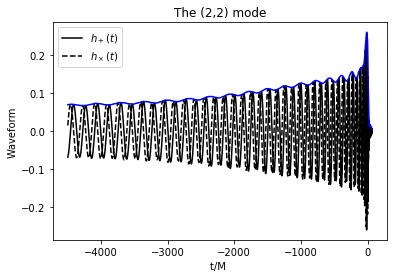

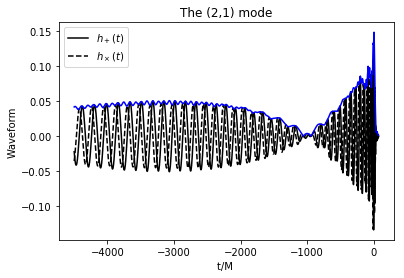

In [16]:
# Evaluate all modes, and plot a few 

#x = np.array([2.00, 0.80, 0.0, 0.0, 0.8]) # spin aligned
x = np.array([2.00, 0.80, 1.505, -1.041+np.pi, 0.8])  # precessing 

lm_modes, times, hre, him = sur_grid12(x, mode_sum=False, fake_neg_modes=False)
print('You have evaluated the modes',lm_modes)

h = hre + 1.0j * him

gwtools.plot_pretty(times, [h[:,4].real, h[:,4].imag],fignum=1)
plt.plot(times,gwtools.amp(h[:,4]),'b')
plt.title('The (%i,%i) mode'%(lm_modes[4][0],lm_modes[4][1]))
plt.xlabel('t/M ')

gwtools.plot_pretty(times, [h[:,3].real, h[:,3].imag],fignum=2)
plt.plot(times,gwtools.amp(h[:,3]),'b')
plt.title('The (%i,%i) mode'%(lm_modes[3][0],lm_modes[3][1]))
plt.xlabel('t/M ')

plt.show()